# Исследование игроков регулярного сезона NBA 2021-2022.

###  Датасет взят с сайта kaggle.com -  https://www.kaggle.com/datasets/vivovinco/nba-player-stats 

### Описание данных:

- `Rk` : Rank
- `Player` : Player's name
- `Pos` : Position
- `Age` : Player's age
- `Tm` : Team
- `G` : Games played
- `GS` : Games started
- `MP` : Minutes played per game
- `FG` : Field goals per game
- `FGA` : Field goal attempts per game
- `FG%` : Field goal percentage
- `3P` : 3-point field goals per game
- `3PA` : 3-point field goal attempts per game
- `3P%` : 3-point field goal percentage
- `2P` : 2-point field goals per game
- `2PA` : 2-point field goal attempts per game
- `2P%` : 2-point field goal percentage
- `eFG%` : Effective field goal percentage
- `FT` : Free throws per game
- `FTA` : Free throw attempts per game
- `FT%` : Free throw percentage
- `ORB` : Offensive rebounds per game
- `DRB` : Defensive rebounds per game
- `TRB` : Total rebounds per game
- `AST` : Assists per game
- `STL` : Steals per game
- `BLK` : Blocks per game
- `TOV` : Turnovers per game
- `PF` : Personal fouls per game
- `PTS` : Points per game

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\datasets\\NBA2122regular.csv',  encoding = 'latin1', sep=';')

In [3]:
def get_info(df):
    print(df.name)
    print()
    display(df.head())
    print(df.info())
    print(df.describe().T)

In [4]:
df.name = 'NBA 2021-2022 Seasons Player Stats Regular Season'

In [5]:
get_info(df)

NBA 2021-2022 Seasons Player Stats Regular Season



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

Проверим наши данные на наличие дубликатов и пропущенных значений. 

In [6]:
print('Количество дубликатов в таблице: {} \nКоличество пропущенных значений: \n{}'.format(df.duplicated().sum(),
                                                                                       df.isna().sum()))

Количество дубликатов в таблице: 0 
Количество пропущенных значений: 
Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64


In [7]:
df['Tm'].value_counts()

TOT    97
WAS    29
MIL    29
BOS    28
IND    28
DAL    27
POR    27
DET    27
CLE    26
OKC    26
SAC    26
LAL    25
UTA    24
BRK    24
ATL    24
SAS    24
LAC    23
PHI    23
TOR    23
MEM    23
NYK    23
PHO    23
CHI    22
DEN    22
ORL    22
NOP    22
MIA    22
CHO    19
HOU    19
MIN    18
GSW    17
Name: Tm, dtype: int64

79 значений `TOT`. Это не название команды, данная аббревиатура означает статистику за обе команды, в которых выступал игрок. Исключим ее из наших данных для более корректного исследования. 

In [8]:
df = df[df['Tm'] != 'TOT']

In [9]:
#проверим
df.Tm.value_counts()

MIL    29
WAS    29
BOS    28
IND    28
POR    27
DAL    27
DET    27
OKC    26
SAC    26
CLE    26
LAL    25
UTA    24
BRK    24
SAS    24
ATL    24
MEM    23
PHO    23
PHI    23
LAC    23
NYK    23
TOR    23
CHI    22
ORL    22
DEN    22
NOP    22
MIA    22
CHO    19
HOU    19
MIN    18
GSW    17
Name: Tm, dtype: int64

Приступим к исследованию. 

Для начала исследуем возраст игроков.

In [10]:
df['Age'].describe()

count    715.000000
mean      25.939860
std        4.084955
min       19.000000
25%       23.000000
50%       25.000000
75%       29.000000
max       41.000000
Name: Age, dtype: float64

Средний возраст игроеов составляет 26 лет, самому возрастному игроку в лиге - 41 год, а самому младшему - 19. Стандартное отклонение - 4.05.

In [11]:
df.query('Age == 41')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
298,228,Udonis Haslem,C,41,MIA,13,0,6.4,1.1,2.4,...,1.0,0.3,1.6,1.9,0.3,0.1,0.1,0.4,1.2,2.5


Вот он, настоящий ветеран баскетбола - Удонис Хаслем из команды "Майами Хит". 

In [12]:
young_players = df.query('Age == 19')

In [13]:
young_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
248,186,Usman Garuba,PF,19,HOU,24,2,10.0,0.8,1.8,...,0.714,0.9,2.6,3.5,0.7,0.4,0.5,0.3,1.2,2.0
253,191,Josh Giddey,SG,19,OKC,54,54,31.5,5.2,12.4,...,0.709,1.8,6.0,7.8,6.4,0.9,0.4,3.2,1.6,12.5
267,205,Jalen Green,SG,19,HOU,67,67,31.9,6.1,14.2,...,0.797,0.5,2.9,3.4,2.6,0.7,0.3,2.0,1.5,17.3
385,287,Keon Johnson,SG,19,LAC,15,0,9.0,1.1,3.4,...,0.762,0.4,1.0,1.4,0.9,0.5,0.1,0.5,1.4,3.5
386,287,Keon Johnson,SG,19,POR,22,12,25.5,3.6,10.0,...,0.833,0.8,1.9,2.7,2.9,1.0,0.5,1.8,2.2,9.7
432,318,Jonathan Kuminga,SF,19,GSW,70,12,16.9,3.4,6.6,...,0.684,0.8,2.6,3.3,0.9,0.4,0.3,1.1,2.1,9.3
523,387,Moses Moody,SG,19,GSW,52,11,11.7,1.5,3.5,...,0.778,0.3,1.2,1.5,0.4,0.1,0.2,0.3,0.8,4.4
552,410,Daishen Nix,SG,19,HOU,24,0,10.9,1.1,2.8,...,0.533,0.3,1.1,1.4,1.7,0.6,0.0,1.1,0.9,3.2
610,460,Joshua Primo,SG,19,SAS,50,16,19.3,2.0,5.4,...,0.746,0.6,1.6,2.3,1.6,0.4,0.5,1.1,1.6,5.8
663,497,Alperen Þengün,C,19,HOU,72,13,20.7,3.5,7.3,...,0.711,1.9,3.5,5.5,2.6,0.8,0.9,2.0,3.0,9.6


А вот молодых талантов в лиге целых 11, один из них, Кеон Джонсон, даже успел сыграть за Лос-Анджелес Клипперс и Портленд.

Визуализируем результат.

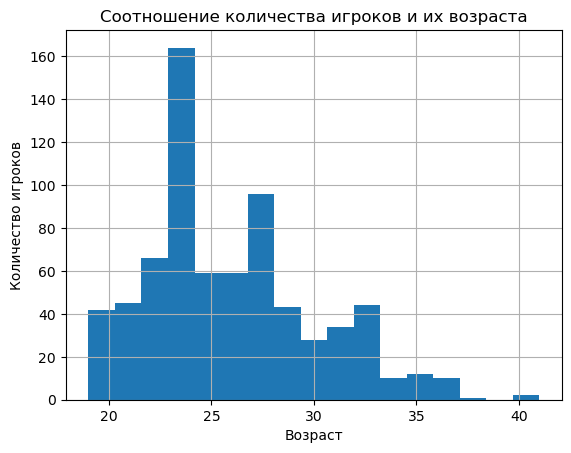

In [14]:
df['Age'].hist(bins='auto')
plt.title('Соотношение количества игроков и их возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.show();

Большинство игроков (чуть больше 160) в лиге выступают в возрасте 24 лет и совсем мало по отношению к молодежи игроков в возрасте 35+. 

Посмотрим на возраст в разрезе команд.

In [15]:
df.groupby('Tm')['Age'].mean().reset_index().sort_values(by='Age', ascending=False)

,Tm,Age
13,LAL,29.080000
2,BRK,28.541667
15,MIA,27.500000
9,GSW,27.411765
16,MIL,27.344828
28,UTA,27.250000
23,PHO,26.869565
12,LAC,26.826087
6,DAL,26.592593
1,BOS,26.500000


Самой возрастной командой в лиге является Лос-Анджелес Лейкерс, самой молодой - Мемфис Гриззлис. Сразу видно, кто делает ставку на опыт, а кто на молодость. 

Посмотрим на индивидуальные результаты игроков по ходу сезонов, а именно на количество игр, минут, в среднем проведенных на площадке, среднее количество набранных очков, ассистов, блоков и  персональных фолов.

In [16]:
players_pivot = df.pivot_table(index='Player', values=['G', 'MP', 'PTS', 'AST', 'BLK', 'PF']).reset_index()

In [17]:
players_pivot.head()

,Player,AST,BLK,G,MP,PF,PTS
0,Aaron Gordon,2.50,0.6,75.0,31.70,2.0,15.00
1,Aaron Henry,0.00,0.3,6.0,2.80,0.3,0.30
2,Aaron Holiday,2.65,0.1,31.5,16.25,1.5,6.45
3,Aaron Nesmith,0.40,0.1,52.0,11.00,1.3,3.80
4,Aaron Wiggins,1.40,0.2,50.0,24.20,1.9,8.30


Найдем десятку самых результативных игроков. 

In [18]:
players_pivot.sort_values(by='PTS', ascending=False).head(10)

,Player,AST,BLK,G,MP,PF,PTS
295,Joel Embiid,4.2,1.5,68.0,33.8,2.7,30.6
374,LeBron James,6.2,1.1,56.0,37.2,2.2,30.3
206,Giannis Antetokounmpo,5.8,1.4,67.0,32.9,3.2,29.9
346,Kevin Durant,6.4,0.9,55.0,37.2,2.1,29.9
553,Trae Young,9.7,0.1,76.0,34.9,1.7,28.4
383,Luka Don?i?,8.7,0.6,65.0,35.4,2.2,28.4
133,DeMar DeRozan,4.9,0.3,76.0,36.1,2.3,27.9
237,Ja Morant,6.7,0.4,57.0,33.1,1.5,27.4
365,Kyrie Irving,5.8,0.6,29.0,37.6,2.8,27.4
449,Nikola Joki?,7.9,0.9,74.0,33.5,2.6,27.1


Итак, в десятке бомбариров у нас:
1. `Джоэл Эмбид`, в среднем набирающий 30.6 очков за игру;
2. `Леброн Джеймс` с результатом 30.3;
3. `Яннис Адетокунбо` - 29.9;
4. `Кевин Дюрант` - 29.9;
5. `Трей Янг` - 28.4;
6. `Лука Дончич` - 28.4;
7. `Демар Дерозан` - 27.9;
8. `Джа Морант` - 27.4;
9. `Кайри Ирвинг` - 27.4;
10. `Никола Йокич` - 27.1.

С наиболее результативными игроками разобрались, посмотрим на любителей нарушать правила.

In [19]:
players_pivot.sort_values(by='PF', ascending=False).head(10)

,Player,AST,BLK,G,MP,PF,PTS
601,Zavier Simpson,7.5,1.0,4.0,43.50,3.80,11.0
245,Jae'Sean Tate,2.8,0.5,78.0,26.40,3.70,11.8
331,Karl-Anthony Towns,3.6,1.1,74.0,33.50,3.60,24.6
263,Jaren Jackson Jr.,1.1,2.3,78.0,27.30,3.50,16.3
159,Domantas Sabonis,5.4,0.4,31.0,34.15,3.45,18.9
327,Jusuf Nurki?,2.8,0.6,56.0,28.20,3.40,15.0
299,Jonas Valan?i?nas,2.6,0.8,74.0,30.30,3.30,17.8
464,Pascal Siakam,5.3,0.6,68.0,37.90,3.30,22.8
158,Dillon Brooks,2.8,0.3,32.0,27.70,3.30,18.4
206,Giannis Antetokounmpo,5.8,1.4,67.0,32.90,3.20,29.9


В десятке "нарушителей":
1. `Завьер Симпсон` - в среднем 3.8 нарушений за матч (и это за всего 4 сыгранные игры!);
2. `Джейшон Тейт` - 3.7;
3. `Карл-Энтони Таунс` - 3.6;
4. `Джарен Джексон` - 3.5;
5. `Домантас Сабонис` - 3.45;
6. `Юсуф Нуркич` - 3.4;
7. `Йонас Валанчунас` - 3.3;
8. `Паскаль Сиакам` - 3.3;
9. `Дилон Брукс` - 3.3;
10. `Яннис Адетокунбо` - 3.2.

Перейдем к десятке самых часто выходящих на площадку игроков.

In [20]:
players_pivot.sort_values(by='G', ascending=False).head(12)

,Player,AST,BLK,G,MP,PF,PTS
419,Mikal Bridges,2.3,0.4,82.0,34.8,1.8,14.2
140,Deni Avdija,2.0,0.5,82.0,24.2,2.3,8.4
504,Saddiq Bey,2.8,0.2,82.0,33.0,1.6,16.1
352,Kevon Looney,2.0,0.6,82.0,21.1,2.6,6.0
169,Dwight Powell,1.2,0.5,82.0,21.9,2.7,8.7
535,Terance Mann,2.6,0.3,81.0,28.6,2.2,10.8
10,Alec Burks,3.0,0.3,81.0,28.6,2.7,11.7
468,Patty Mills,2.3,0.2,81.0,29.0,1.4,11.4
84,Chris Boucher,0.3,0.9,80.0,21.1,2.2,9.4
162,Dorian Finney-Smith,1.9,0.5,80.0,33.1,2.3,11.0


Вот они, игроки, которые несмотря ни на что рвутся в бой в каждой игре:
- `Микал Бриджес`, `Дени Авдия`, `Саддик Бей`, `Кевон Луни`, `Двайт Пауэлл` сыграли по 82 матча;
- `Теренс Мэнн`, `Алек Буркс` и  `Пэтти Миллс` 81 матч;
- `Крис Буше`, `Дориан Финни-Смит`, `Эван Фурнье` и `Майлз Бриджес` - 80 матчей.

Статистику по матчам узнали, а что с минутами, проведенными на площадке?

In [21]:
players_pivot.sort_values(by='MP', ascending=False).head(10)

,Player,AST,BLK,G,MP,PF,PTS
601,Zavier Simpson,7.50,1.00,4.0,43.50,3.80,11.00
416,Melvin Frazier,0.30,0.00,3.0,40.00,2.70,10.70
464,Pascal Siakam,5.30,0.60,68.0,37.90,3.30,22.80
189,Fred VanVleet,6.70,0.50,65.0,37.90,2.50,20.30
365,Kyrie Irving,5.80,0.60,29.0,37.60,2.80,27.40
258,James Harden,10.35,0.45,32.5,37.35,2.35,21.75
374,LeBron James,6.20,1.10,56.0,37.20,2.20,30.30
346,Kevin Durant,6.40,0.90,55.0,37.20,2.10,29.90
109,Damian Lillard,7.30,0.40,29.0,36.40,1.30,24.00
133,DeMar DeRozan,4.90,0.30,76.0,36.10,2.30,27.90


В десятке игроков с самым большим средним временем на площадке нет ни одного игрока из десятки самых часто выходящих на площадку.
По количеству сыгранных минут за игру десятка лидеров выглядит следующим образом:
1. `Завьер Симпсон` - в среднем 43.5 минуты на площадке за игру; 
2. `Мелвин Фрейзер` - 40 минут;
3. `Паскаль Сиакам` - 37.9;
4. `Фред Ванвлит` - 37.9;
5. `Кайри Ирвинг` - 37.6;
6. `Джеймс Харден` - 37.35;
7. `Леброн Джеймс` - 37.2;
8. `Кевин Дюрант` - 37.2; 
9. `Дамиан Лиллард` - 36.4;
10. `Демар Дерозан` - 36.1.

И наконец посмотрим на лучших ассистентов и защитников: игроков с самыми высокими результатами результативных передач и блоков.

In [22]:
players_pivot.sort_values(by='AST', ascending=False).head(10)

,Player,AST,BLK,G,MP,PF,PTS
87,Chris Paul,10.80,0.30,65.0,32.90,2.10,14.70
258,James Harden,10.35,0.45,32.5,37.35,2.35,21.75
553,Trae Young,9.70,0.10,76.0,34.90,1.70,28.40
138,Dejounte Murray,9.20,0.30,68.0,34.80,2.00,21.10
383,Luka Don?i?,8.70,0.60,65.0,35.40,2.20,28.40
119,Darius Garland,8.60,0.10,68.0,35.70,1.70,21.70
574,Tyrese Haliburton,8.50,0.65,38.5,35.30,1.65,15.90
449,Nikola Joki?,7.90,0.90,74.0,33.50,2.60,27.10
367,LaMelo Ball,7.60,0.40,75.0,32.30,3.20,20.10
601,Zavier Simpson,7.50,1.00,4.0,43.50,3.80,11.00


In [23]:
players_pivot.sort_values(by='BLK', ascending=False).head(10)

,Player,AST,BLK,G,MP,PF,PTS
435,Myles Turner,1.0,2.8,42.0,29.4,2.8,12.9
263,Jaren Jackson Jr.,1.1,2.3,78.0,27.3,3.5,16.3
23,Anthony Davis,3.1,2.3,40.0,35.1,2.4,23.2
491,Robert Williams,2.0,2.2,61.0,29.6,2.2,10.0
499,Rudy Gobert,1.1,2.1,66.0,32.1,2.7,15.6
424,Mitchell Robinson,0.5,1.8,72.0,25.7,2.7,8.5
249,Jakob Poeltl,2.8,1.7,68.0,29.0,3.1,13.5
426,Mo Bamba,1.2,1.7,71.0,25.7,2.6,10.6
182,Evan Mobley,2.5,1.7,69.0,33.8,2.1,15.0
217,Hassan Whiteside,0.4,1.6,65.0,17.9,2.8,8.2


Десятка лидеров по количеству передач за игру выглядит следующим образом:
1. `Крис Пол` с результатом в 10.8 результативных передач за игру;
2. `Джеймс Гарден` - 10.35;
3. `Трей Янг` занимает третье место с результатом 9.7;
4. `Деджонте Мюррей` - 9.2;
5. `Лука Дончич` - 8.7;
6. `Дариус Гарланд` - 8.6;
7. `Тайриз Халибертон` - 8.5; 
8. `Никола Йокич` - 7.9;
9. `ЛаМело Болл` - 7.6;
10. `Завиер Симпсон` - 7.5.

А десятка лучших по блок-шотам:
1. `Майлз Тернер` - в среднем 2.8 блок-шота за игру;
2. `Энтони Дэвис` - 2.3;
3. `Джарен Джексон` - 2.3;
4. `Роберт Уильямс` - 2.2; 
5. `Руди Гоберт` - 2.1;
6. `Майкл Робинсон` - 1.8;
7. `Эван Мобли` - 1.7;
8. `Мо Бамба` - 1.7;
9. `Джейкоб Пелтл` - 1.7;
10. `Хассан Уайтсайд` - 1.6.

Напоследок найдем лидеров по трехочковым броскам.

In [24]:
stats_3P = df[['Player','3P', '3PA', '3P%']]

Для начала найдем главных любителей "покидать трёшки". 

In [25]:
#сгруппируем чтобы учесть данные у игроков, игравших в нескольких командах
stats_3P.groupby('Player')['3P','3PA','3P%'].mean().sort_values(by='3PA', ascending=False).head(10).reset_index()

,Player,3P,3PA,3P%
0,Stephen Curry,4.5,11.70,0.380
1,Fred VanVleet,3.7,9.90,0.377
2,Donovan Mitchell,3.5,9.80,0.355
3,Damian Lillard,3.2,9.80,0.324
4,Klay Thompson,3.6,9.30,0.385
5,Luka Don?i?,3.1,8.80,0.353
6,Buddy Hield,3.2,8.75,0.365
7,Jayson Tatum,3.0,8.60,0.353
8,Anthony Edwards,3.0,8.40,0.357
9,Paul George,2.9,8.30,0.354


Стефен Карри уверенно лидирует по попыткам трехочковых бросков. Вся же десятка лидеров бросков с дальней дистанции выглядит так:
1. `Стефен Карри` - в среднем 11.7 попыток за игру;
2. `Фред Ванфлит` - 9.9;
3. `Донован Митчелл` - 9.8; 
4. `Дамиан Лиллард` - 9.8;
5. `Клэй Томпсон` - 9.3;
6. `Лука Дончич` - 8.8;
7. `Бадди Хилд` - 8.75;
8. `Джейсон Татум` - 8.6;
9. `Энтони Эдвардс` - 8.4;
10. `Пол Джордж` - 8.3.

А теперь десятку с самым высоким процентным попаданием. Но для начала отфильтруем данные по количеству бросков за игру, возьмем за минимальный порок 5. 

In [26]:
stats3P_new = stats_3P[stats_3P['3PA'] > 4]

In [27]:
stats3P_new.groupby('Player')['3P','3PA','3P%'].mean().sort_values(by='3P%', ascending=False).head(10).reset_index()

,Player,3P,3PA,3P%
0,Norman Powell,2.45,5.25,0.474
1,Joe Harris,2.90,6.30,0.466
2,Luke Kennard,2.70,6.00,0.449
3,Josh Richardson,1.90,4.30,0.444
4,Desmond Bane,3.00,6.90,0.436
5,Seth Curry,2.65,6.05,0.434
6,Tyrese Maxey,1.80,4.10,0.427
7,Cameron Johnson,2.50,5.90,0.425
8,Lonzo Ball,3.10,7.40,0.423
9,Doug McDermott,2.10,5.00,0.422


И вот мы получили десятку игроков с наилучшей точностью трехочковых бросков:
1. `Норман Пауэлл` - 47.4% удачных бросков;
2. `Джо Харрис` - 46.6%;
3. `Люк Кеннард` - 44.9%; 
4. `Джош Ричардсон` - 44.4%;
5. `Дезмонд Бейн` - 43.6%;
6. `Сет Карри` - 43.4%;
7. `Тайриз Макси` - 42.7%;
8. `Кэмерон Джонсон`- 42.5%;
9. `Лонзо Болл` - 42.3%;
10. `Дуг МакДермотт`- 42.2%.

Теперь подробнее изучим амплуа игроков.

In [28]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [29]:
df.Pos.value_counts()

SG    181
SF    144
PG    138
PF    134
C     118
Name: Pos, dtype: int64

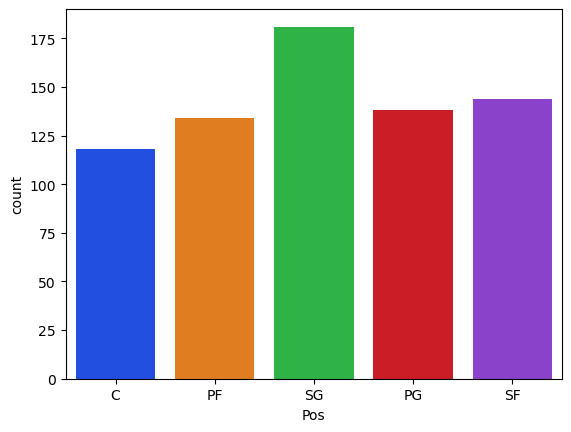

In [45]:
#визуализируем 

sns.countplot(x=df.Pos, palette='bright')
plt.show;

Итак, в нашей таблице представлены игроки, разделенные на 5 ролей, опишем их:
- `SG (Shooting Guard)` - атакующий защитник. В круг действий этого игрока входят две основные обязанности — завершение атак и опека опасных в нападении соперников;
- `SF (The Small Forward)` - легкий форвард. Основной задачей для такого игрока, как и для атакующего защитника, является набор очков;
- `PG (Point Guard)` - разыгрывающий защитник. Разыгрывающий защитник создает условия и ситуации на площадке таким образом, чтобы каждый партнёр мог принести как можно больше пользы команде;
- `PF (Power Forward)` - тяжелый форвард. Главной задачей тяжелого форварда является подбор мяча в нападении и защите;
- `C (Center)` - центровой; Основная задача — игра под кольцом.

Теперь исследуем каждую позицию по отдельности.

Найдем среднее количество очков, блок-шотов, результативных передач и средний возраст игроков разных позиций. 

In [32]:
mean_pts_per_pos = df.groupby('Pos')['PTS'].mean().reset_index().sort_values(by='PTS', ascending=False)

In [33]:
mean_pts_per_pos

,Pos,PTS
2,PG,8.752174
1,PF,7.953731
0,C,7.884746
4,SG,7.741436
3,SF,7.452083


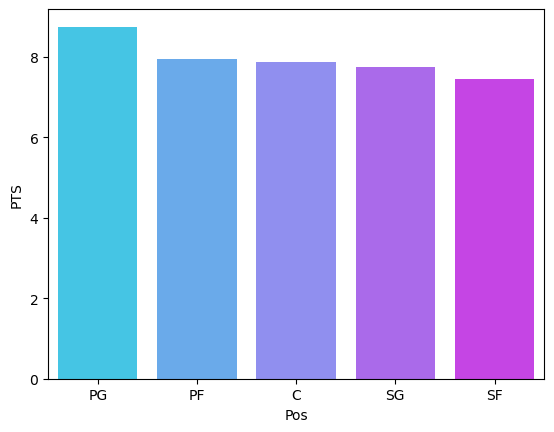

In [34]:
sns.barplot(data=mean_pts_per_pos, x='Pos', y='PTS', palette='cool')
plt.show;

Можем наблюдать по таблице и графику, что самыми результативными в среднем являются игроки позиции Point Guard, они с небольшим отрывом опережают Power Forward.

Теперь выясним как дела обстоят с блокшотами.

In [35]:
mean_block_per_pos = df.groupby('Pos')['BLK'].mean().reset_index().sort_values(by='BLK', ascending=False)

In [36]:
mean_block_per_pos

,Pos,BLK
0,C,0.697458
1,PF,0.467164
3,SF,0.286806
2,PG,0.230435
4,SG,0.209392


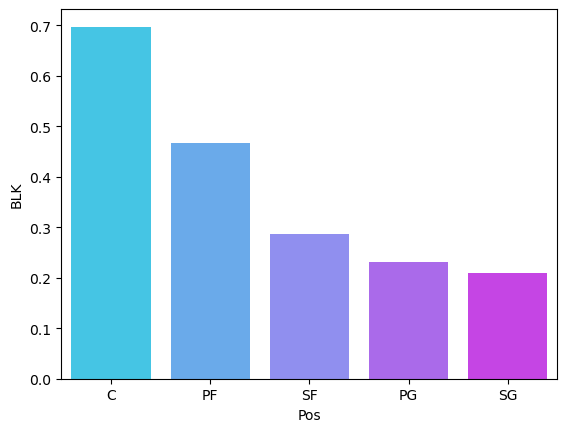

In [37]:
sns.barplot(data=mean_block_per_pos, x='Pos', y='BLK', palette='cool')
plt.show;

С большим отрывом лидиуют центровые. Не удивительно, ведь согласно статистике, это самые высокие игроки в команде. 

Перейдем к результативным передачам.


In [38]:
mean_ast_per_pos = df.groupby('Pos')['AST'].mean().reset_index().sort_values(by='AST', ascending=False)

In [39]:
mean_ast_per_pos

,Pos,AST
2,PG,3.374638
4,SG,1.780110
3,SF,1.349306
1,PF,1.329104
0,C,1.208475


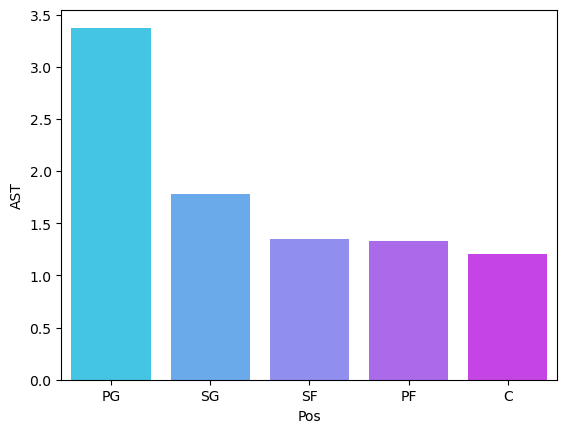

In [40]:
sns.barplot(data=mean_ast_per_pos, x='Pos', y='AST', palette='cool')
plt.show;

И снова впереди игроки позиции разыгрывающих защитников. 

И наконец посмотрим на распределение возраста в разбивке позиций в команде. 

In [41]:
mean_age_per_pos = df.groupby('Pos')['Age'].mean().reset_index().sort_values(by='Age', ascending=False)

In [42]:
mean_age_per_pos 

,Pos,Age
0,C,26.728814
2,PG,26.326087
1,PF,25.962687
4,SG,25.491713
3,SF,25.465278


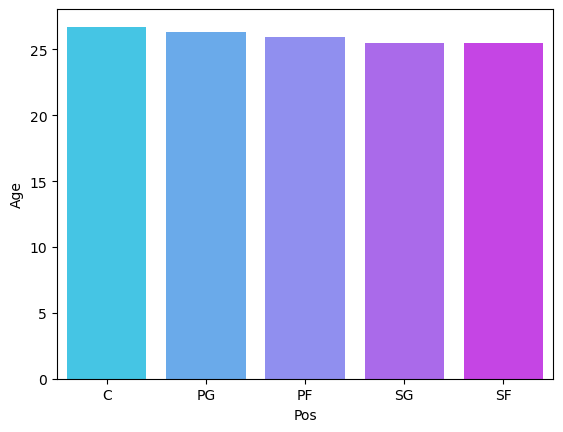

In [43]:
sns.barplot(data=mean_age_per_pos, x='Pos', y='Age', palette='cool')
plt.show;

С возрастом у всех позиций ровно,небольшим лидером являтся центровые, однако разница несущественна. 

Построим еще один график и поподробнее изучим возраст на всех позициях. 

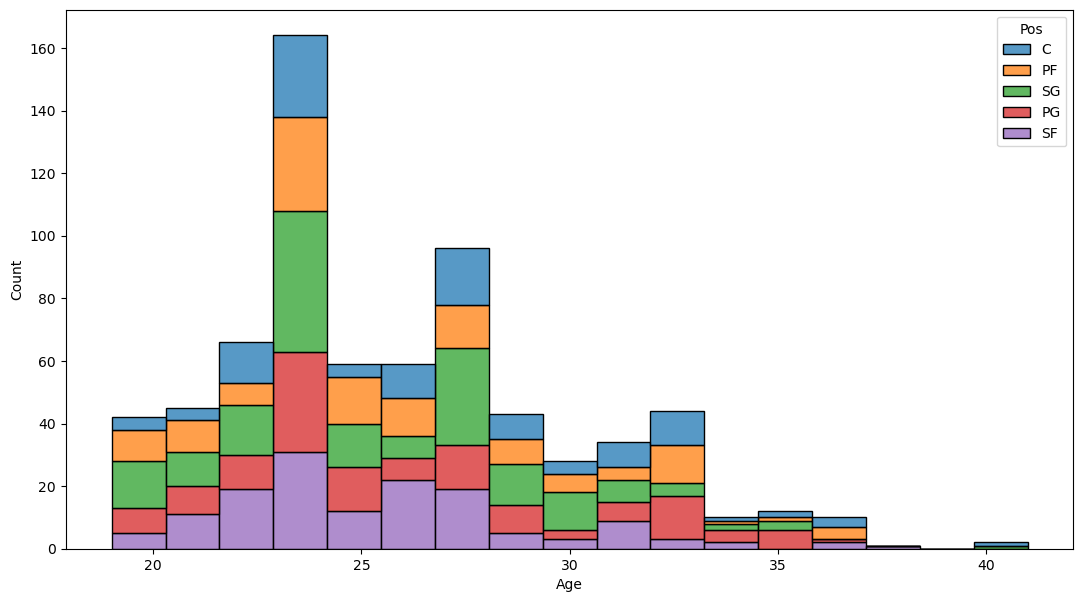

In [44]:
plt.figure(figsize=(13,7))
sns.histplot(data=df, x='Age', hue='Pos', multiple="stack")
plt.show;

В целом распределение равномерно, никаких сильно выделяющихся значений. 

## Вывод:
- Исходные данные предоставлены в отличном состоянии, предобработка практически не требовалась;
 - В ходе исследования мы:
    - выявили самого возрастного и самых молодых игроков регулярного сезона, самых результативных,а также самых часто нарушающих правила;
    - игроков, которые проводят на площадке больше всех времени;
    - игроков, любящих броски с дальней дистанции и самых метких из них;
    - а также посмотрели на результативность игроков в разрезе их игровой позиции с помощью построения таблиц и графиков для более наглядного результата. 